# **Data Exploration Categorical Dataset**

* categorical Dataset n Lung Cancer
https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link?resource=download

This is a categorical dataset. All featuers, except for Age, Gender and Risk Level, are ordinal with values ranging from 1 to 7, or from 1 to 8. These values are discrete and indicate the prevalance of the feature in the patient

## Necessary Imports

In [11]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
#import tarfile
#import urllib
import pandas as pd
#import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Loading Categorical Data

With this code, I load the categorical dataset from a folder into a panda datafame 

In [12]:
LUNG_CATEGORICAL_PATH = os.path.join("..", "dataset", "lung_categorical")

def load_lung_categorical(lung_categorical_path=LUNG_CATEGORICAL_PATH):
    csv_path = os.path.join(lung_categorical_path, "lung_categorical.csv")
    return pd.read_csv(csv_path)

lung_categorical = load_lung_categorical() 

print("Shape of data: ", lung_categorical.shape)
lung_categorical.head() #Display first five rows of the frame

Shape of data:  (1000, 26)


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


#### Initial Observations:

There a 26 features in total, one of them is the target class - Level (Risk Level of Lung Cancer)

Most data, 21 features, are categorical and of ordinal type. With values ranging from 1 to 7 or from 1 to 8

One feature, Level - the target calss, is categorical, of ordinal type, with possible string values ["Low","Medium","High"]

Two features, index and Patient Id are simply labels for the instances and can be dropepd, as they do not provide useful information for training models, and the instances in the panda dataframe are indexed automatically.

The feature Age is numberical and ratio 

The feature Gender is of binary nominal type, taking on possible values of ["1","2"]

This dataset has 1000 instances.

In [13]:
# Drop the 'Patient Id' and 'Age' columns in place
lung_categorical.drop(columns=['Patient Id', 'index'], inplace=True)

# Verify if the columns were dropped
print("Columns after dropping 'Patient Id' and 'Age':", lung_categorical.columns)

Columns after dropping 'Patient Id' and 'Age': Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


## Initial Anlysis of Dataset

In [14]:
lung_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [15]:
lung_categorical.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

The data has no missing values. Every attribute of the 309 instances has a value.

In [16]:
lung_categorical.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


The range of ages is  wide, from 14 to 73, with mean being exactly in between, hinting at quite an equal spread. 

For the Gender attribute, the mean is 1.4, indicating that one gender is slightly more represented. It is unclear which gender it is, as it is not stated which is male or female, 1 and 2

For the other categorical fatures the mean is generally between 3 and 5 and std is between 1.4 and 2.5. This does not hint at any abnormalities.

In [17]:
lung_categorical['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

The target class, Level, is quite equally distributed, which is good for training models. No oversmplng needed.

## Further Data Analysis

#### Age Dstribution

<Axes: >

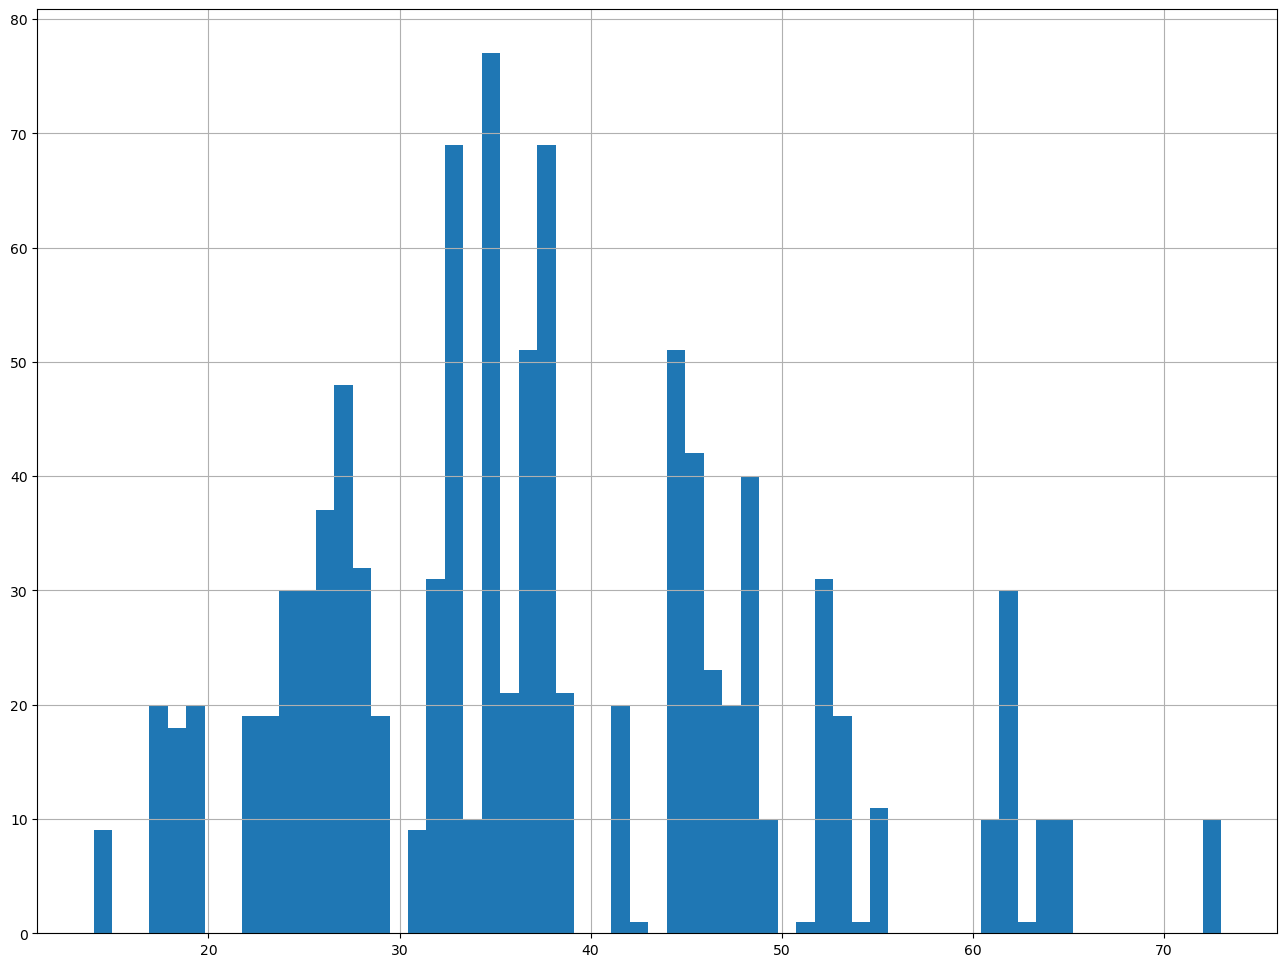

In [22]:
lung_categorical['Age'].hist(bins=61, figsize=(16,12))

The ages are normally distributed, with the peak at age 35.

There is a very noticable abnormality, many age values not being represented. First, there are many instances for ages 33, 35 and 37. But much fewer at ages 34 and 36. The same can be observed for other age values, where a certain age has signigicantly fewer or more instances than itsneighbouring values. Second, certain age ranges like 21-22, 39-41, 55-60, 65-72 are not represented at all.

This is quite unusual and there is no explanation as to why this is the case.